In [33]:
# read and write image data
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# scikit-image for image filtering
from skimage import color, io
from skimage.exposure import rescale_intensity
from skimage.transform import resize
#data 
import tensorflow as tf
from tensorflow import keras

In [101]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## load data

In [11]:
fashion_image = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images,test_labels) = fashion_image.load_data() 

4422102/4422102 [==============================] - 2s 0us/step


In [23]:
# name of labels 
class_names= ['T-shirt', 'Trouser','pulllover','Dress' , 'Coat' ,
            'Sandal' , 'Shirt' , 'Sneaker' , 'bag' , 'Ankle boot']

## Explore Data

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
test_images.shape

(10000, 28, 28)

In [27]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [67]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## preprocess 

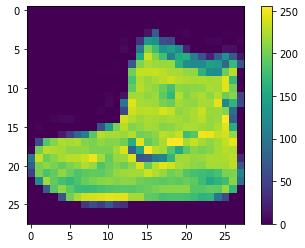

In [28]:
# image for boot
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [30]:
# Normalization
train_images = train_images/255.0
test_images = test_images/255.0

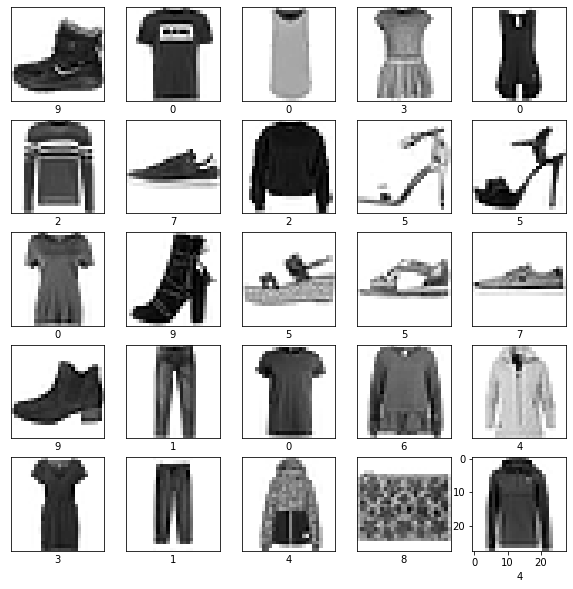

In [80]:
# Display first 5 images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap = plt.cm.binary) # the color map is black/white
    plt.xlabel(train_labels[i])

## Bulit the model

In [148]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # to make the image 1D # input
    keras.layers.Dense(units = 128, activation='relu'), # hadden
    keras.layers.Dense(units = 10, activation='softmax') # output
    ])

In [149]:
#compliling
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Train the model

In [150]:
h = model.fit(train_images , train_labels , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4971 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3757 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3350 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2950 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2776 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2659 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2555 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2477 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

 ## test the model

In [152]:
pred = model.predict(test_images)

313/313 [==============================] - 0s 916us/step


In [153]:
pred[0]

array([5.5119841e-07, 1.4073063e-08, 7.4235686e-07, 9.9233217e-09,
       5.1661747e-08, 1.0554818e-03, 1.3197456e-06, 6.5221541e-02,
       8.3072464e-06, 9.3371195e-01], dtype=float32)

In [154]:
np.argmax(pred[0])

9

In [155]:
test_labels[0]

9

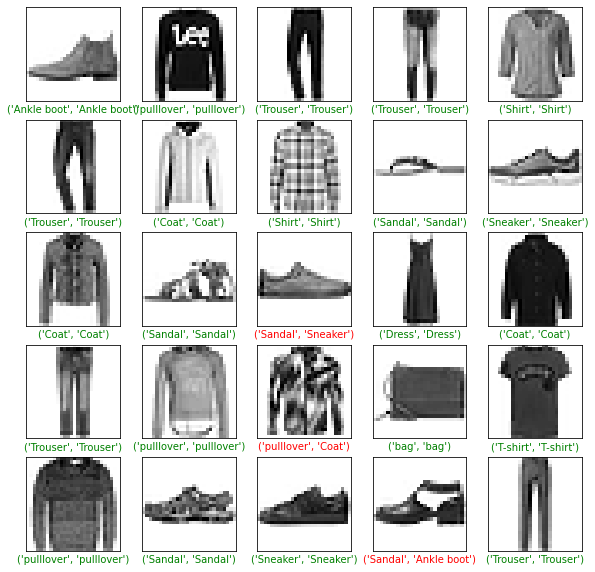

In [156]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i],cmap = plt.cm.binary) # the color map is black/white
    predicted_label = np.argmax(pred[i])# argmax # get the index of  the max value of array
    plt.xlabel(class_names[predicted_label])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color='green'
    else:
        color='red'
        
    plt.xlabel((class_names[predicted_label],class_names[true_label] ),color=color)
# it seems good model 

## Evaluate and plot the Model 

In [157]:
test_loss, test_acc = history.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3528 - accuracy: 0.8753 - 296ms/epoch - 945us/step


In [163]:
h.history.keys()

dict_keys(['loss', 'accuracy'])

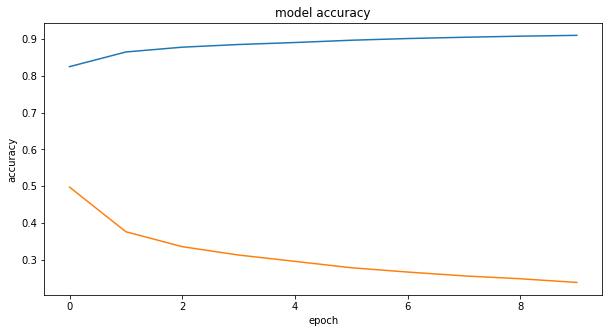

In [167]:
plt.figure(figsize=(10,5));
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.plot(h.history['accuracy']);
plt.plot(h.history['loss']);